In [2]:
%tensorflow_version 2.x

In [3]:
from google.colab import drive #toimport google drive data

In [5]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd /content/drive/"My Drive/"

/content/drive/My Drive


In [7]:
cd "Project Dataset/"

/content/drive/My Drive/Project Dataset


In [8]:
ls

dataset/


In [9]:
#load basic libraries
import pandas as pd
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [10]:
df = pd.read_csv('dataset/Tagrecommendation.csv') #loading csv file

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
tags=df['tags']

In [ ]:
body=df['title']+df['body']

In [ ]:
len(tags)

676204

In [ ]:
len(body)

676204

In [ ]:
body[0]

"Convert Decimal to Double?<p>I want to use a track-bar to change a form's opacity.</p>\n\n<p>This is my code:</p>\n\n<pre><code>decimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n</code></pre>\n\n<p>When I build the application, it gives the following error:</p>\n\n<blockquote>\n  <p>Cannot implicitly convert type <code>'decimal'</code> to <code>'double'</code>.</p>\n</blockquote>\n\n<p>I tried using <code>trans</code> and <code>double</code> but then the control doesn't work. This code worked fine in a past VB.NET project.</p>\n"

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 50 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617768 sha256=574f00b28a551290182767fdad37c05df5b8488c6090a23a80ce26294336ccac
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import json

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()
def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id', 'tags',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date', 'title', 'body'],
      dtype='object')

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=df.drop(labels = ['Unnamed: 0', 'id', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'owner_user_id',
       'answer_count', 'comment_count', 'favorite_count',
       'community_owned_date'], axis=1)

In [ ]:
data_raw = df[:10000]
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 10000
Number of columns in data = 3


**Sample data:**


,tags,title,body
0,<c#><floating-point><type-conversion><double><...,Convert Decimal to Double?,<p>I want to use a track-bar to change a form'...
1,<html><css><css3><internet-explorer-7>,Percentage width child element in absolutely p...,<p>I have an absolutely positioned <code>div</...
2,<c#><.net><datetime>,How do I calculate someone's age in C#?,<p>Given a <code>DateTime</code> representing ...
3,<c#><datetime><time><datediff><relative-time-s...,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...
4,<javascript><html><browser><timezone><timezone...,Determine a User's Timezone,<p>Is there any standard way for a Web Server ...


In [ ]:
for i in range(len(data_raw)):
  if(i%1000==0):
    print(i)
  tags=[]
  tg=data_raw['tags'][i].split('>')
  for k in range(len(tg)-1):
    tags.append(tg[k].replace('<',''))
  data_raw['tags'][i]=tags

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [ ]:
data_raw

,tags,title,body
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,<p>I want to use a track-bar to change a form'...
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,<p>I have an absolutely positioned <code>div</...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,<p>Given a <code>DateTime</code> representing ...
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,<p>Is there any standard way for a Web Server ...
...,...,...,...
9995,"[c++, c, oop, memory-management, memory-leaks]",Is it acceptable not to deallocate memory,<p>I'm working on a project that is supposed t...
9996,[c#],Where to put using statements in a C# .cs file,"<p><strong>DUPE: <a href=""https://stackoverflo..."
9997,"[c#, .net, networking, mono, wifi]",How do I get the available wifi APs and their ...,<p>Is there any way to access all WiFi access ...
9998,"[c#, windows-services]",Is it possible to log who started or stopped a...,<p>I have some windows services written in C#....


In [ ]:
# Data Cleaning & Preprocessing techniques
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [ ]:
data_raw['title']

0                              Convert Decimal to Double?
1       Percentage width child element in absolutely p...
2                 How do I calculate someone's age in C#?
3                           Calculate relative time in C#
4                             Determine a User's Timezone
                              ...                        
9995            Is it acceptable not to deallocate memory
9996       Where to put using statements in a C# .cs file
9997    How do I get the available wifi APs and their ...
9998    Is it possible to log who started or stopped a...
9999    Connecting to remote URL which requires authen...
Name: title, Length: 10000, dtype: object

In [ ]:
import re
# creating clean text feature
features = ['body','title']
for feature in features:
    data_raw['clean_' + feature] = data_raw[feature].apply(clean_text)

In [ ]:
data_raw

,tags,title,body,clean_body,clean_title
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,<p>I want to use a track-bar to change a form'...,p i want to use a track bar to change a form s...,convert decimal to double
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,<p>I have an absolutely positioned <code>div</...,p i have an absolutely positioned code div cod...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,<p>Given a <code>DateTime</code> representing ...,p given a code datetime code representing a pe...,how do i calculate someone s age in c
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,p given a specific code datetime code value ho...,calculate relative time in c
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,<p>Is there any standard way for a Web Server ...,p is there any standard way for a web server t...,determine a user s timezone
...,...,...,...,...,...
9995,"[c++, c, oop, memory-management, memory-leaks]",Is it acceptable not to deallocate memory,<p>I'm working on a project that is supposed t...,p i m working on a project that is supposed to...,is it acceptable not to deallocate memory
9996,[c#],Where to put using statements in a C# .cs file,"<p><strong>DUPE: <a href=""https://stackoverflo...",p strong dupe a href https stackoverflow com q...,where to put using statements in a c cs file
9997,"[c#, .net, networking, mono, wifi]",How do I get the available wifi APs and their ...,<p>Is there any way to access all WiFi access ...,p is there any way to access all wifi access p...,how do i get the available wifi aps and their ...
9998,"[c#, windows-services]",Is it possible to log who started or stopped a...,<p>I have some windows services written in C#....,p i have some windows services written in c wh...,is it possible to log who started or stopped a...


In [ ]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

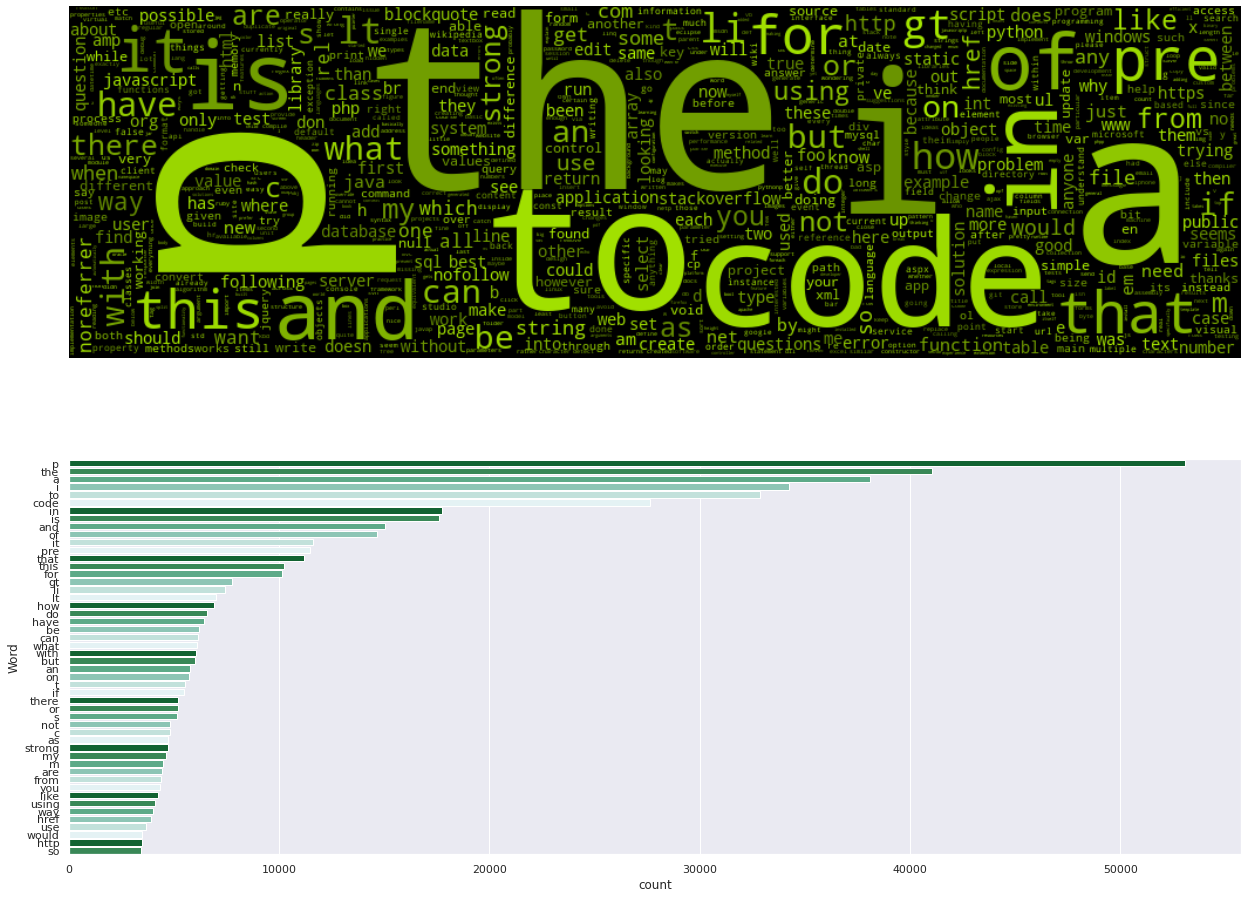

In [ ]:
freq_words(data_raw['clean_title']+data_raw['clean_body'], 50)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data_raw['description']=data_raw['clean_title']+data_raw['clean_body']

In [ ]:
data_raw

,tags,title,body,clean_body,clean_title,description
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,<p>I want to use a track-bar to change a form'...,p i want to use a track bar to change a form s...,convert decimal to double,convert decimal to doublep i want to use a tra...
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,<p>I have an absolutely positioned <code>div</...,p i have an absolutely positioned code div cod...,percentage width child element in absolutely p...,percentage width child element in absolutely p...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,<p>Given a <code>DateTime</code> representing ...,p given a code datetime code representing a pe...,how do i calculate someone s age in c,how do i calculate someone s age in cp given a...
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,p given a specific code datetime code value ho...,calculate relative time in c,calculate relative time in cp given a specific...
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,<p>Is there any standard way for a Web Server ...,p is there any standard way for a web server t...,determine a user s timezone,determine a user s timezonep is there any stan...
...,...,...,...,...,...,...
9995,"[c++, c, oop, memory-management, memory-leaks]",Is it acceptable not to deallocate memory,<p>I'm working on a project that is supposed t...,p i m working on a project that is supposed to...,is it acceptable not to deallocate memory,is it acceptable not to deallocate memoryp i m...
9996,[c#],Where to put using statements in a C# .cs file,"<p><strong>DUPE: <a href=""https://stackoverflo...",p strong dupe a href https stackoverflow com q...,where to put using statements in a c cs file,where to put using statements in a c cs filep ...
9997,"[c#, .net, networking, mono, wifi]",How do I get the available wifi APs and their ...,<p>Is there any way to access all WiFi access ...,p is there any way to access all wifi access p...,how do i get the available wifi aps and their ...,how do i get the available wifi aps and their ...
9998,"[c#, windows-services]",Is it possible to log who started or stopped a...,<p>I have some windows services written in C#....,p i have some windows services written in c wh...,is it possible to log who started or stopped a...,is it possible to log who started or stopped a...


In [ ]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    filtered=[x for x in no_stopword_text if len(x)>2]
    return ' '.join(filtered)
  
data_raw['description'] = data_raw['description'].apply(lambda x: remove_stopwords(x))

In [ ]:
data_raw

,tags,title,body,clean_body,clean_title,description
0,"[c#, floating-point, type-conversion, double, ...",Convert Decimal to Double?,<p>I want to use a track-bar to change a form'...,p i want to use a track bar to change a form s...,convert decimal to double,convert decimal doublep want use track bar cha...
1,"[html, css, css3, internet-explorer-7]",Percentage width child element in absolutely p...,<p>I have an absolutely positioned <code>div</...,p i have an absolutely positioned code div cod...,percentage width child element in absolutely p...,percentage width child element absolutely posi...
2,"[c#, .net, datetime]",How do I calculate someone's age in C#?,<p>Given a <code>DateTime</code> representing ...,p given a code datetime code representing a pe...,how do i calculate someone s age in c,calculate someone age given code datetime code...
3,"[c#, datetime, time, datediff, relative-time-s...",Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,p given a specific code datetime code value ho...,calculate relative time in c,calculate relative time given specific code da...
4,"[javascript, html, browser, timezone, timezone...",Determine a User's Timezone,<p>Is there any standard way for a Web Server ...,p is there any standard way for a web server t...,determine a user s timezone,determine user timezonep standard way web serv...
...,...,...,...,...,...,...
9995,"[c++, c, oop, memory-management, memory-leaks]",Is it acceptable not to deallocate memory,<p>I'm working on a project that is supposed t...,p i m working on a project that is supposed to...,is it acceptable not to deallocate memory,acceptable deallocate memoryp working project ...
9996,[c#],Where to put using statements in a C# .cs file,"<p><strong>DUPE: <a href=""https://stackoverflo...",p strong dupe a href https stackoverflow com q...,where to put using statements in a c cs file,put using statements filep strong dupe href ht...
9997,"[c#, .net, networking, mono, wifi]",How do I get the available wifi APs and their ...,<p>Is there any way to access all WiFi access ...,p is there any way to access all wifi access p...,how do i get the available wifi aps and their ...,get available wifi aps signal strength netp wa...
9998,"[c#, windows-services]",Is it possible to log who started or stopped a...,<p>I have some windows services written in C#....,p i have some windows services written in c wh...,is it possible to log who started or stopped a...,possible log started stopped windows servicep ...


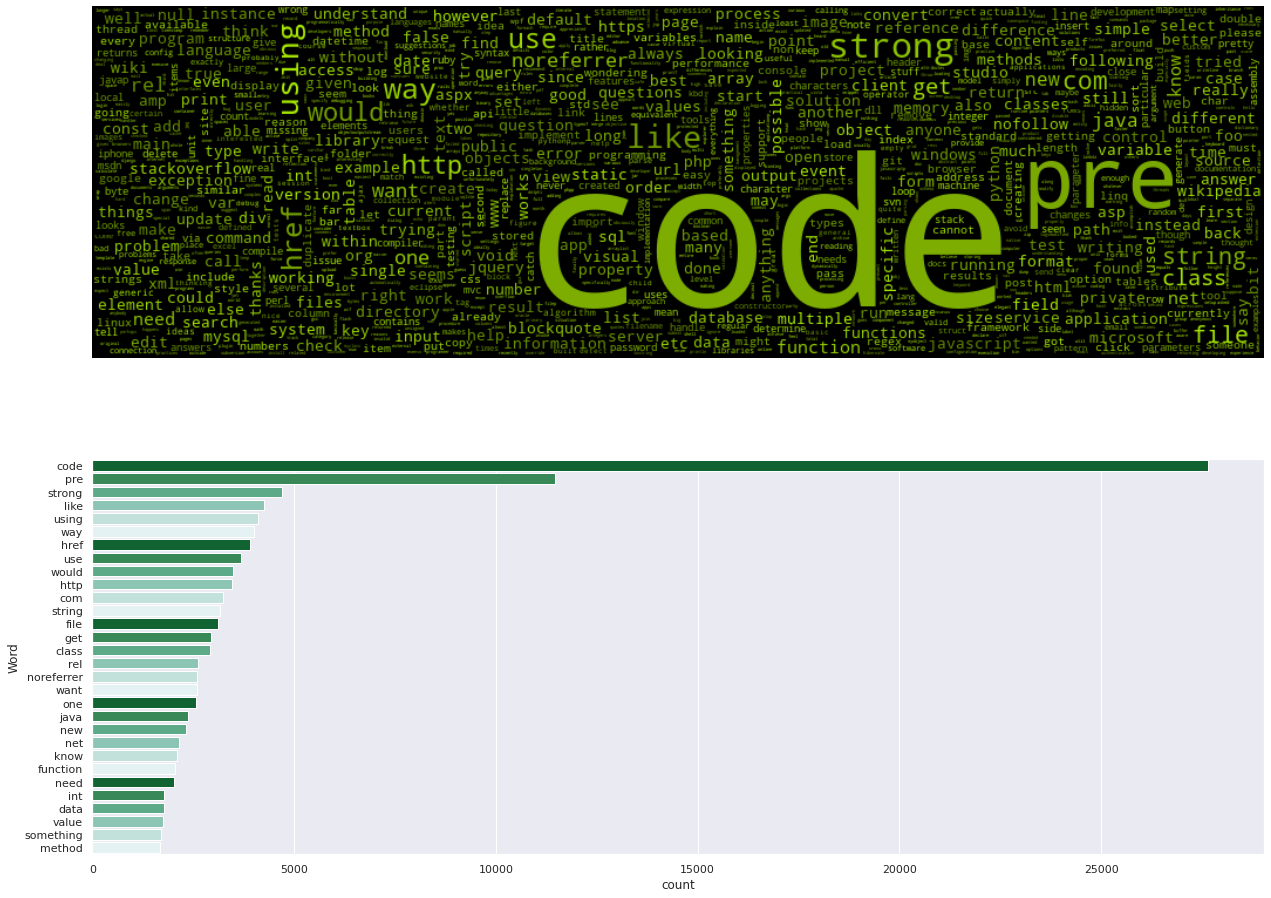

In [ ]:
freq_words(data_raw['description'], 30)

In [ ]:
# get all genre tags in a list
all_tags = sum(data_raw['tags'],[])
len(set(all_tags))

3790

In [ ]:
all_tags = nltk.FreqDist(all_tags)
all_tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 'Count': list(all_tags.values())})


In [ ]:
sorted_tags = all_tags_df.sort_values(by='Count', ascending=False)
sorted_tags.head(40)

,Tag,Count
0,c#,1686
9,.net,1109
49,java,1057
85,c++,814
14,javascript,696
102,python,681
28,php,557
175,c,396
24,sql,381
5,html,316


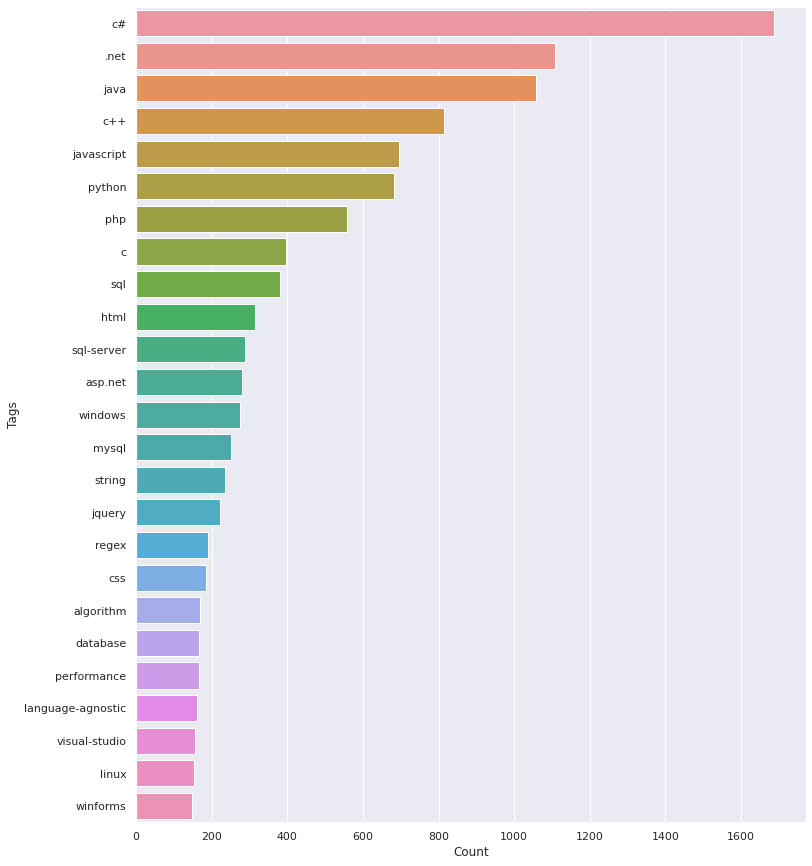

In [ ]:

g = all_tags_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Tag")
ax.set(ylabel = 'Tags')
plt.show()

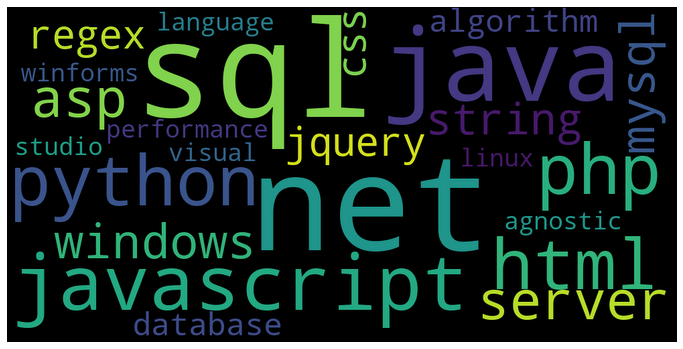

In [ ]:
text = " ".join(review for review in g.Tag)
wordcloud = WordCloud(width=1000, height=500,max_font_size=200).generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

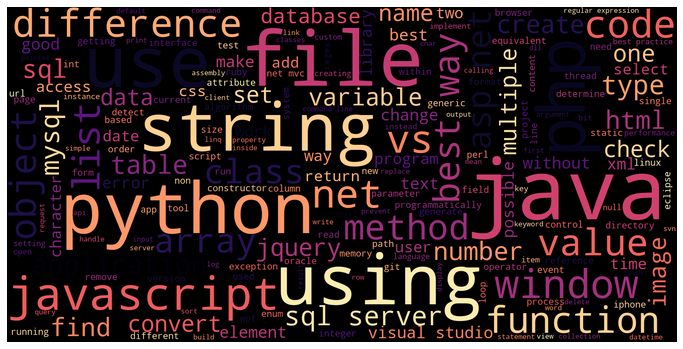

In [ ]:
text = " ".join(review for review in data_raw.clean_title)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
#Text Mining Algorithms

In [ ]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [ ]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [ ]:
data_raw.columns

Index(['tags', 'title', 'body', 'clean_body', 'clean_title', 'description'], dtype='object')

In [ ]:
mb = MultiLabelBinarizer()
mb.fit(data_raw['tags'])

y = mb.transform(data_raw['tags'])

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_raw['description'], y, test_size=0.20, random_state=42)

In [ ]:
# Tf-Idf transformation 
xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)
xtrain_tfidf.shape

(8000, 10000)

In [ ]:
# Count Vectorizer transformation
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [ ]:
xtrain_cv.shape


(8000, 10000)

In [ ]:
evaluation_list=[]


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
oneVsRest = OneVsRestClassifier(log_reg)
oneVsRest.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest.predict(xtest_tfidf)

def get_performance(y_test, y_pred):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return accuracy, precision, recall, f1score

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 11.45
Precision : 0.8404558404558404
Recall    : 0.09841534612176814
F1-score   : 0.17619829774525908


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [ ]:
#Multinomial Naive Bayes
nbayes = MultinomialNB()
oneVsRest_nb = OneVsRestClassifier(nbayes)
oneVsRest_nb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_nb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 15.0
Precision : 0.9272727272727272
Recall    : 0.008507089241034195
F1-score   : 0.016859504132231407


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Multinomial Naive Bayes'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [ ]:
#Linear SVC
linear_svc = LinearSVC()
oneVsRest_svc = OneVsRestClassifier(linear_svc)
oneVsRest_svc.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [ ]:
y_pred = oneVsRest_svc.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 64.0
Precision : 0.7755598831548198
Recall    : 0.265721434528774
F1-score   : 0.3958255683935893


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Linear SVC'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [ ]:
#Random Forest
rforest = RandomForestClassifier(n_estimators=100)
oneVsRest_rf = OneVsRestClassifier(rforest)
oneVsRest_rf.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                            

In [ ]:
y_pred = oneVsRest_rf.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 15.45
Precision : 0.8622222222222222
Recall    : 0.12944120100083403
F1-score   : 0.22509064539521395


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'RandomForestClassifier'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [ ]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

In [ ]:
#optimization Grid-Search
param = {'estimator__penalty':['l1', 'l2'], 'estimator__C':[0.001, 0.01, 1, 10]}

In [ ]:
oneVsRest.get_params().keys()


dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
# GridSearchCV
kf=KFold(n_splits=10, shuffle=True, random_state=55)
lr_grid = GridSearchCV(oneVsRest, param_grid = param, cv = kf, scoring='f1_micro', n_jobs=-1)
lr_grid.fit(xtrain_tfidf, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=55, shuffle=True),
             error_score=nan,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                            

In [ ]:
# examine the best model
print(lr_grid.best_score_)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.33706919126758605
{'estimator__C': 10, 'estimator__penalty': 'l2'}
OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)


In [ ]:
# Optimized Logistic Regression Model
log_reg = LogisticRegression(C=10, penalty='l2')
ovr = OneVsRestClassifier(log_reg)
ovr.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:

# performance metrics of the optimized model
y_pred = ovr.predict(xtest_tfidf)

accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 4.65
Precision : 0.7771329077190946
Recall    : 0.22335279399499583
F1-score   : 0.3469810831821715


In [ ]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression with l2'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [ ]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

,Test Accuracy,Precision,Recall,F1
Model,,,,
Linear SVC,64.00,0.78,0.27,0.40
RandomForestClassifier,15.45,0.86,0.13,0.23
Multinomial Naive Bayes,15.00,0.93,0.01,0.02
Logistic Regression,11.45,0.84,0.10,0.18
Logistic Regression with l2,4.65,0.78,0.22,0.35


In [ ]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = ovr.predict(text_vec)
    return mb.inverse_transform(y_pred)

In [ ]:
for i in range(20):
    sp = X_test.sample(1).index[0]
    if(infer_tags(X_test[sp])!=[()]):
      print("Title: ", data_raw['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",data_raw['tags'][sp], "\n")

Title:  Ignoring accented letters in string comparison 
Predicted tag:  [('c#', 'string')]
Actual tag:  ['c#', 'string', 'localization'] 

Title:  How can I deploy an iPhone application from Xcode to a real iPhone device? 
Predicted tag:  [('ios', 'iphone', 'objective-c')]
Actual tag:  ['ios', 'xcode', 'deployment', 'certificate'] 

Title:  ObservableCollection that also monitors changes on the elements in collection 
Predicted tag:  [('collections',)]
Actual tag:  ['c#', 'collections'] 

Title:  Java: Enum parameter in method 
Predicted tag:  [('c#',)]
Actual tag:  ['java', 'parameters', 'methods', 'enums'] 

Title:  Eclipse C++ dll import 
Predicted tag:  [('dll', 'eclipse')]
Actual tag:  ['c++', 'eclipse', 'dll', 'import'] 

Title:  Visual Studio jscript intellisense error with jQuery 1.2.6? 
Predicted tag:  [('jquery',)]
Actual tag:  ['asp.net', 'jquery', 'intellisense'] 

Title:  Is T-SQL Stored Procedure Execution 'atomic'? 
Predicted tag:  [('stored-procedures',)]
Actual tag:  [